In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\nehap\OneDrive\Desktop\market segmentation of online vehicle booking\online_vehicle_bookings_india.csv")
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

Booking_ID         0
User_ID            0
Vehicle_Type       0
Pickup_Location    0
Drop_Location      0
Booking_Date       0
Booking_Time       0
Distance_km        0
Fare               0
Payment_Mode       0
Driver_ID          0
Status             0
dtype: int64

In [4]:


# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_numeric = df[numeric_cols]

# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# Fix PCA to use valid n_components
n_components = min(scaled_df.shape[0], scaled_df.shape[1])  # Can't exceed this
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_df)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_data)


In [5]:
pca_df.head()

,0,1,2
0,-1.378580,-1.415040,-0.009214
1,-0.235647,-1.616881,0.115237
2,0.918260,-1.827698,-0.272594
3,-2.064926,-1.036846,-0.054536
4,1.547959,-1.833436,-0.027337


In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

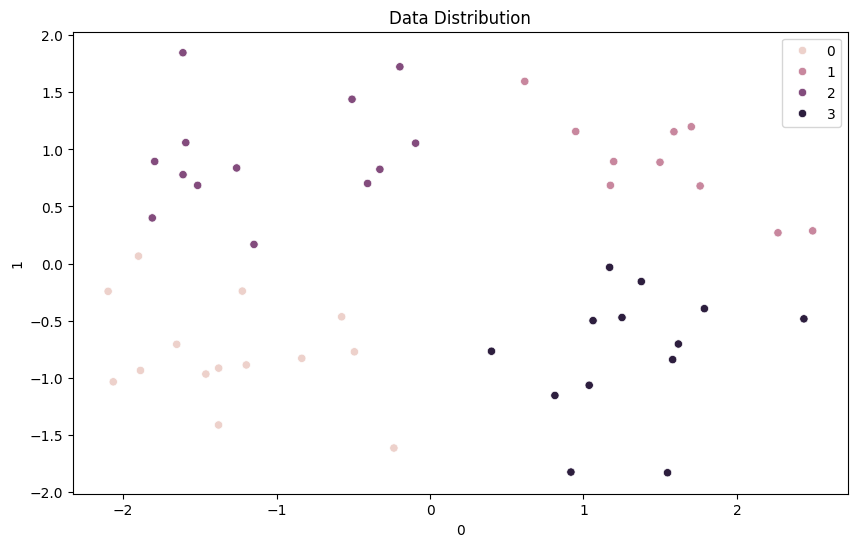

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df)
KMeans (n_clusters=4)

np.random.seed(42)
preds = kmeans.predict(pca_df)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_df[0],y=pca_df[1],hue=preds)
plt.title('Data Distribution')
plt.show()


<Axes: xlabel='cluster', ylabel='count'>

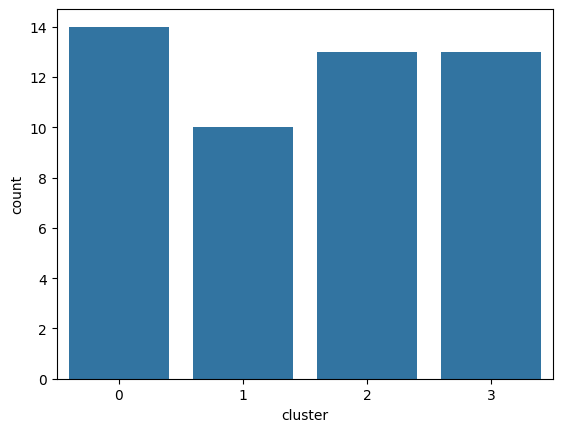

In [9]:
df['cluster'] = preds
sns.countplot(x = df['cluster'])

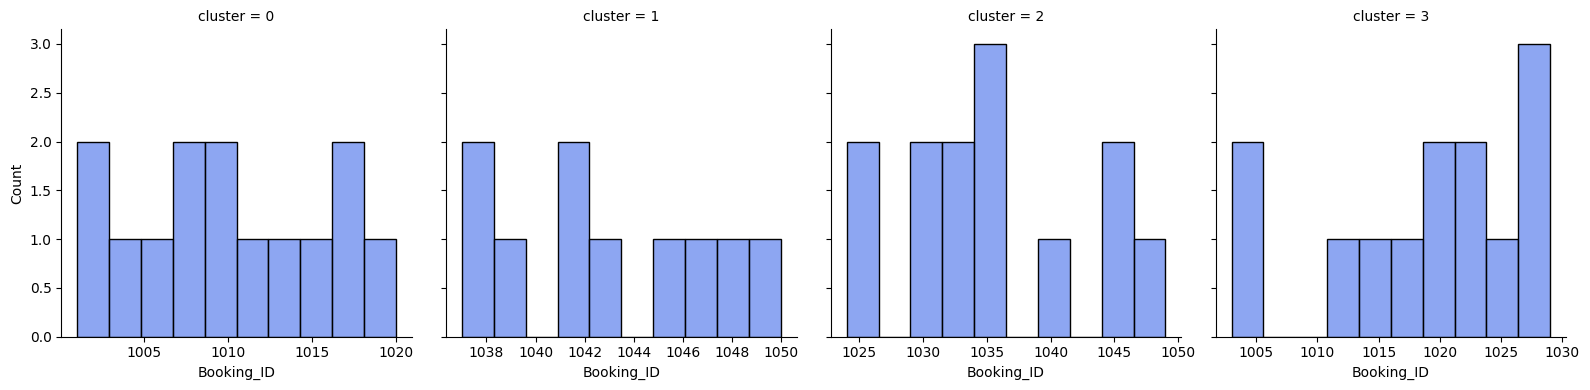

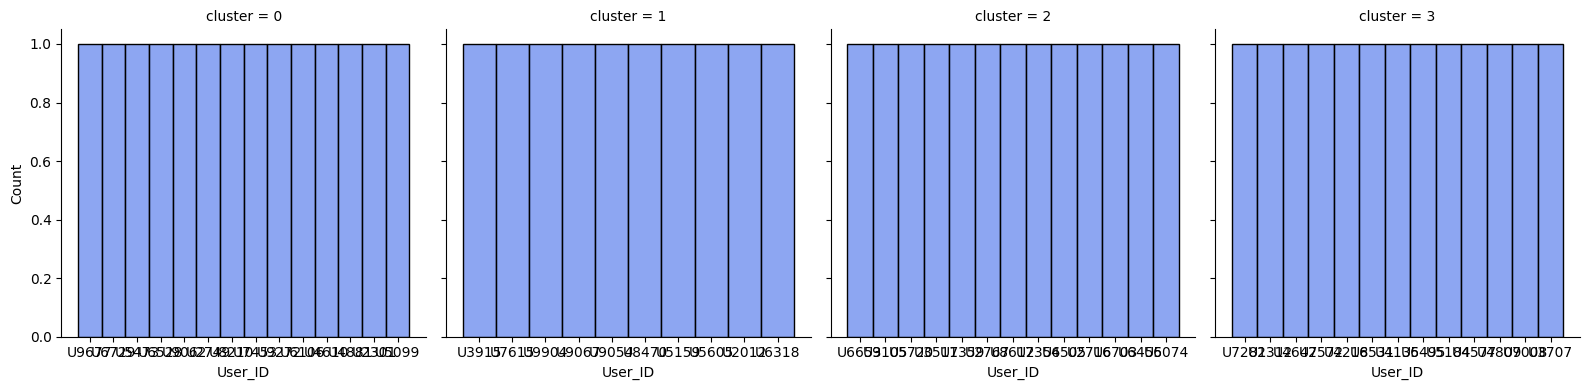

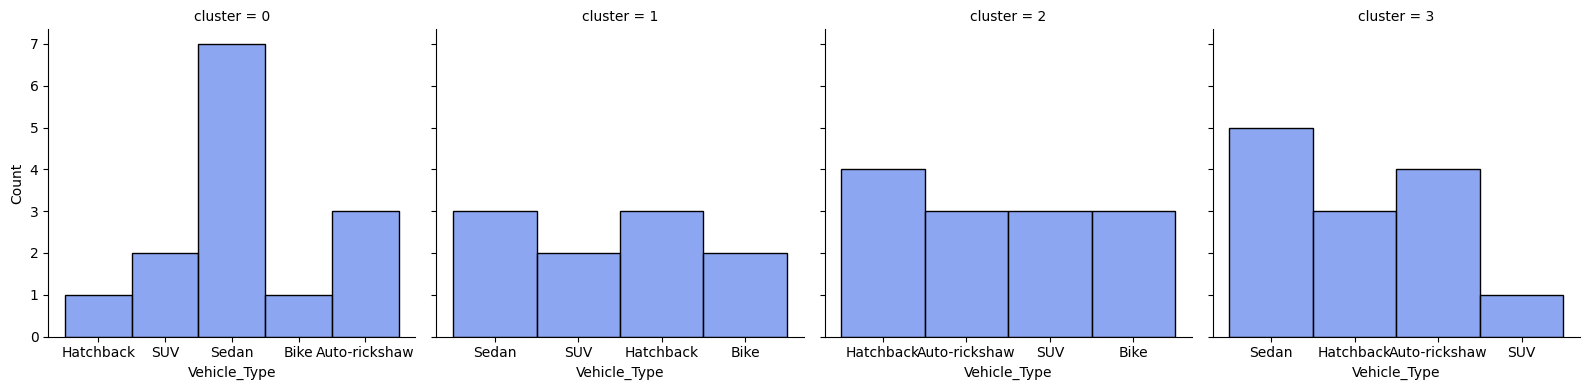

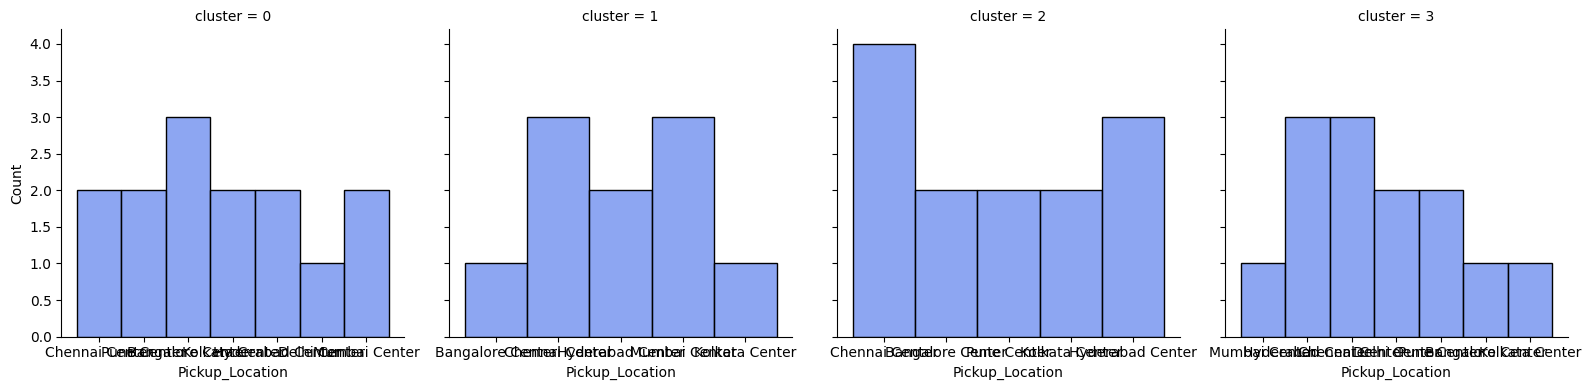

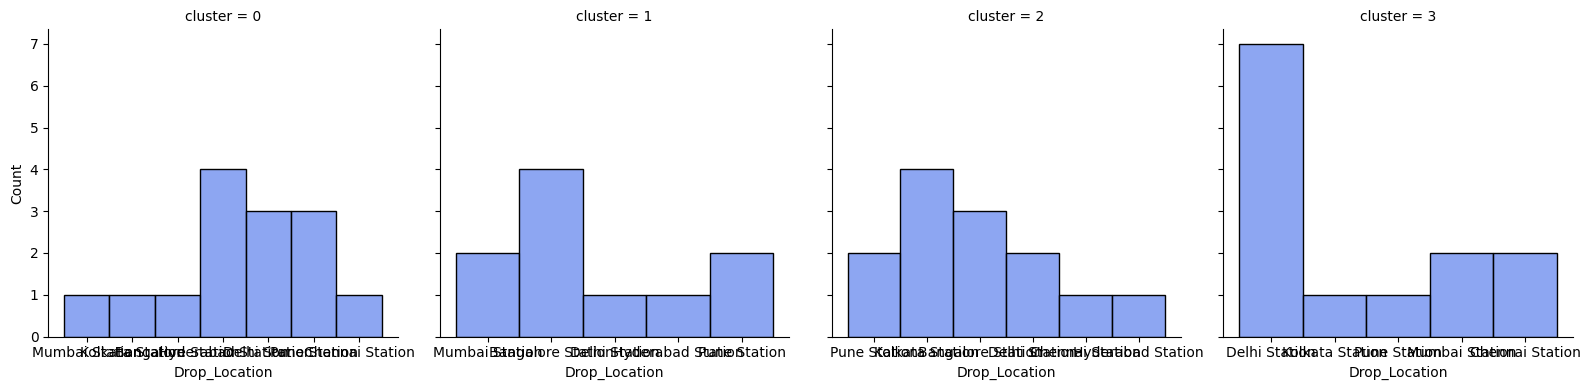

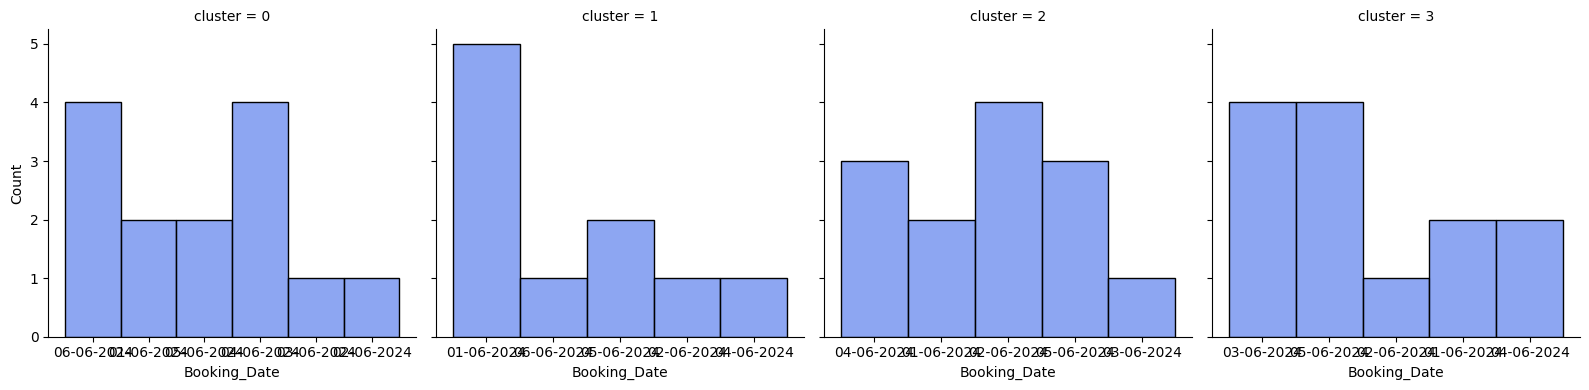

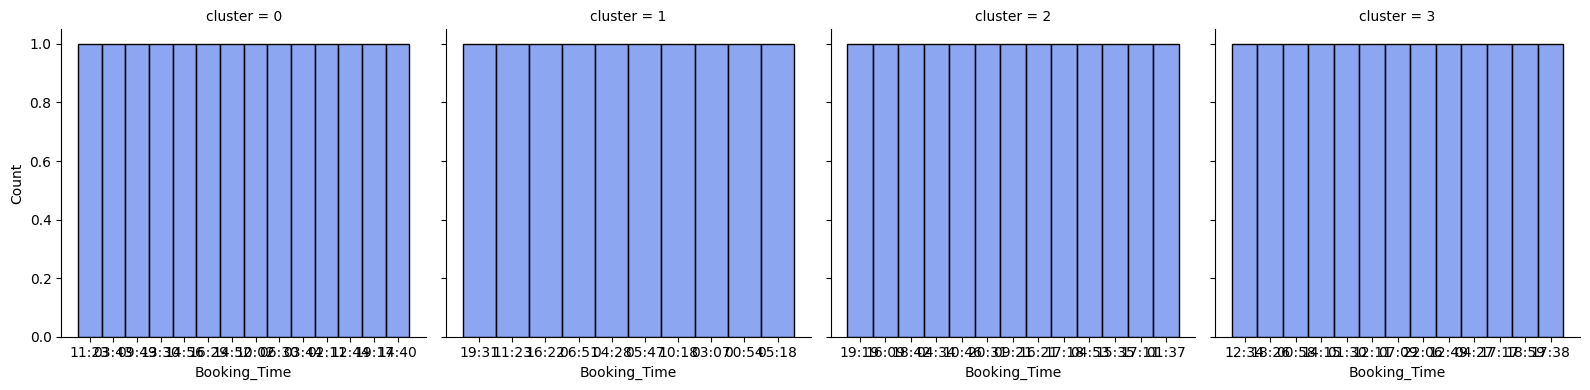

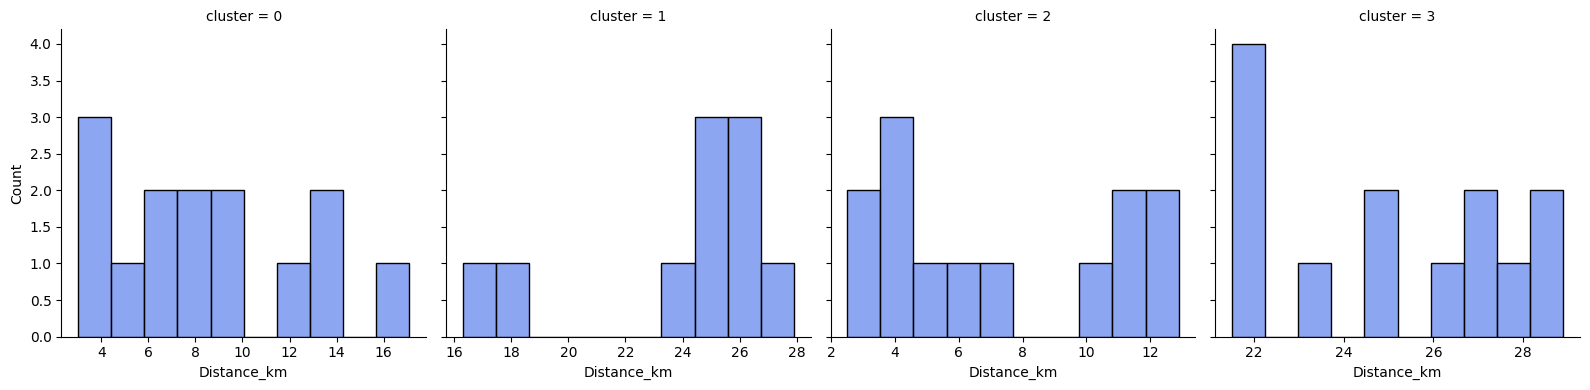

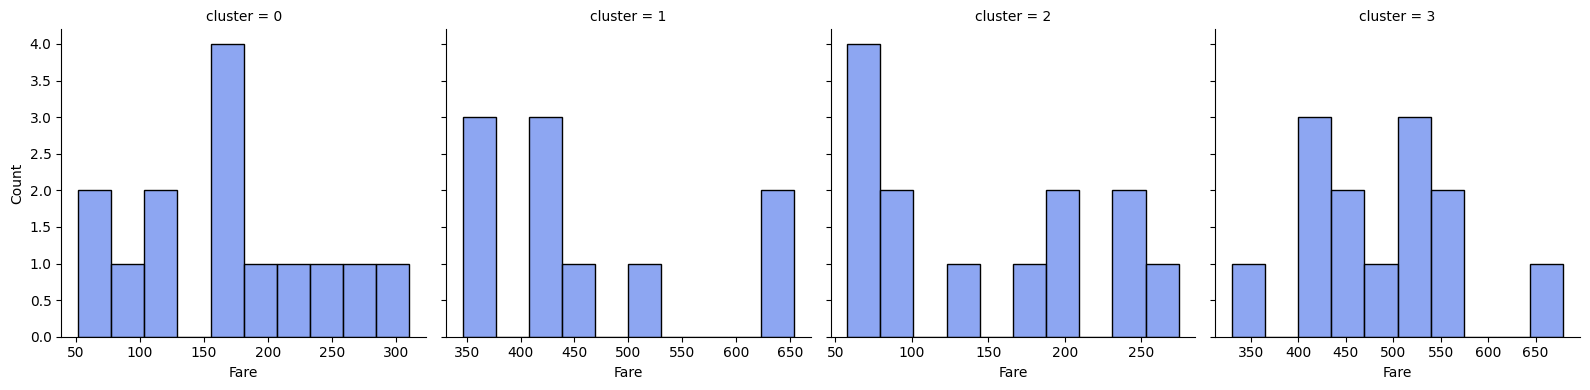

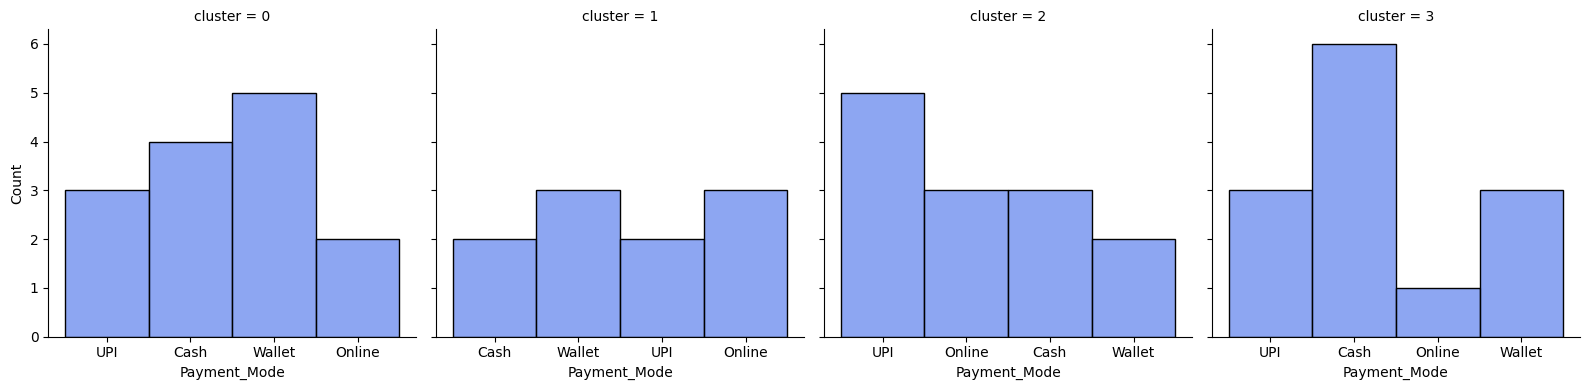

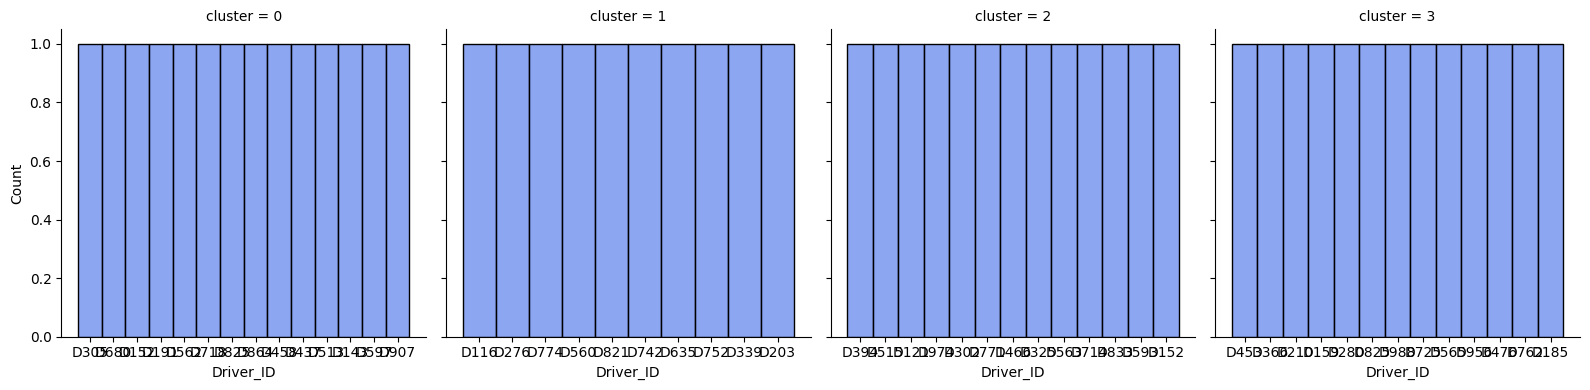

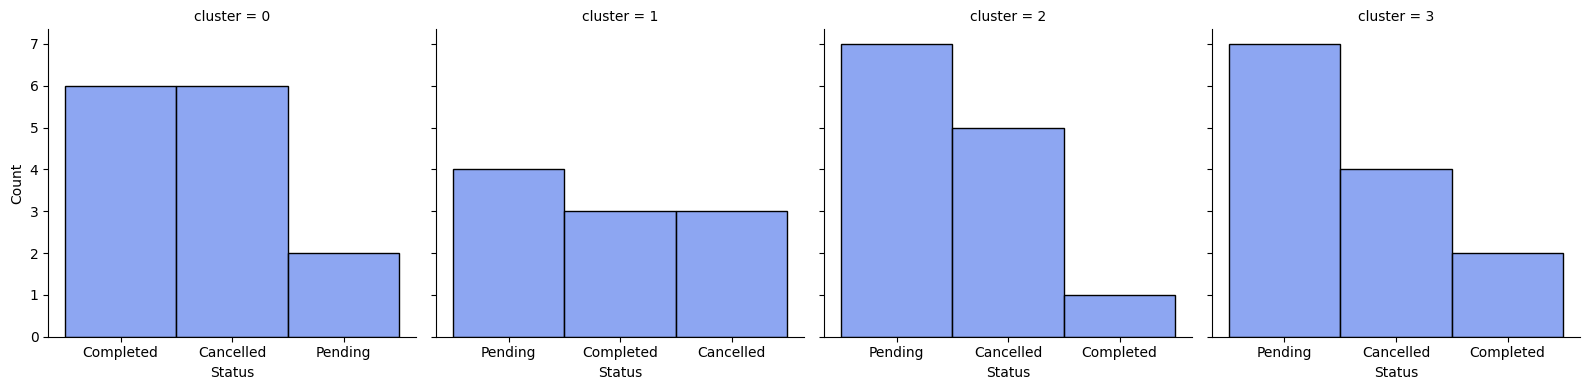

NameError: name 'Scaled_df' is not defined

In [10]:
#segment profiling 
sns.set_palette('coolwarm')

for i in df.drop('cluster', axis=1):
    grid = sns.FacetGrid(df, height=4, col='cluster', sharex=False)
    grid = grid.map(sns.histplot, i, bins=10)
    plt.show()

#removing noise
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)
model=dbscan.fit(Scaled_df)
labels=model.labels_

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np


dbscan = DBSCAN(eps=0.5, min_samples=5)  
labels = dbscan.fit_predict(scaled_df)   


sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

if n_clusters > 1:
    print("Silhouette Score:", metrics.silhouette_score(scaled_df, labels))
else:
    print("Silhouette Score cannot be computed (only one cluster found)")


Number of clusters: 3
Silhouette Score: 0.07763837926149496
